In [35]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [36]:
train_data=pl.read_csv("train_featureEngineered.csv")
test_data=pl.read_csv("test_featureEngineered.csv")
train_data

customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBin,fe1,fe3
str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,i64,i64,i64,f64,f64,f64,i64,f64,f64
"""1393-IMKZG""",0,1,1,1,"""No""","""Fiber optic""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""",1,1,1,95.85,95.85,0.0,1,0.04101,0.999001
"""6008-NAIXK""",1,1,1,54,"""No phone service""","""DSL""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""",12,1,1,55.45,2966.95,0.0,0,0.440829,54000.0
"""1403-LKLIK""",0,0,0,33,"""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""",12,0,0,20.1,579.4,0.0,0,0.67515,33000.0
"""4550-VBOFE""",1,0,1,70,"""Yes""","""Fiber optic""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""",1,1,1,102.95,7101.5,1.0,0,0.324936,70000.0
"""7113-HIPFI""",0,0,0,66,"""No""","""DSL""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""No""",24,0,0,65.85,4097.05,0.0,0,0.425691,66000.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""0675-NCDYU""",0,0,0,72,"""Yes""","""Fiber optic""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""",24,1,0,116.4,8543.25,0.0,0,0.305492,72000.0
"""5090-EMGTC""",0,0,1,59,"""No""","""Fiber optic""","""No""","""Yes""","""No""","""Yes""","""Yes""","""Yes""",24,1,0,100.05,6034.85,0.0,0,0.307718,59000.0
"""0378-XSZPU""",0,0,1,58,"""No""","""DSL""","""Yes""","""Yes""","""Yes""","""No""","""No""","""No""",12,0,0,60.3,3563.8,1.0,0,0.434452,58000.0


In [37]:
ratio=len(train_data.filter(train_data["Churn"]==1))/(len(train_data))
ratio

0.26569165143205364

In [38]:
from sklearn.metrics import (RocCurveDisplay,accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
                             ,ConfusionMatrixDisplay,classification_report,classification_report)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.svm import SVC
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

X_train=train_data.drop("customerID","Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("customerID","Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("tranformer", transformer),
        ("classifier", LogisticRegression(class_weight={0:1,1:ratio*10})),
    ]
)
pipe

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies']),
                                                 ('scaler', StandardScaler(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'MonthlyChargesBin', 'fe1',
                                                   'fe3'])])),
                ('classifier',
                 LogisticRegression(class_weight={0: 1,
                                                  1: 2.656916514320536}))])

In [39]:
from sklearn.model_selection import cross_val_predict
predictions= cross_val_predict(pipe,X_test,y_test)

print("logistic regression accuracy :",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic regression accuracy : 0.7524893314366998
auc roc 0.773431994362227
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      1548
         1.0       0.52      0.82      0.64       561

    accuracy                           0.75      2109
   macro avg       0.72      0.77      0.72      2109
weighted avg       0.81      0.75      0.77      2109



In [106]:
X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

import umap
reducer = umap.UMAP(n_components=2,n_neighbors=2, random_state=42)
embedding = reducer.fit_transform(X_train_scaled)
X_umap=reducer.transform(X_test_scaled)
embedding.shape

(4923, 2)

Text(0, 0.5, 'UMAP Component 2')

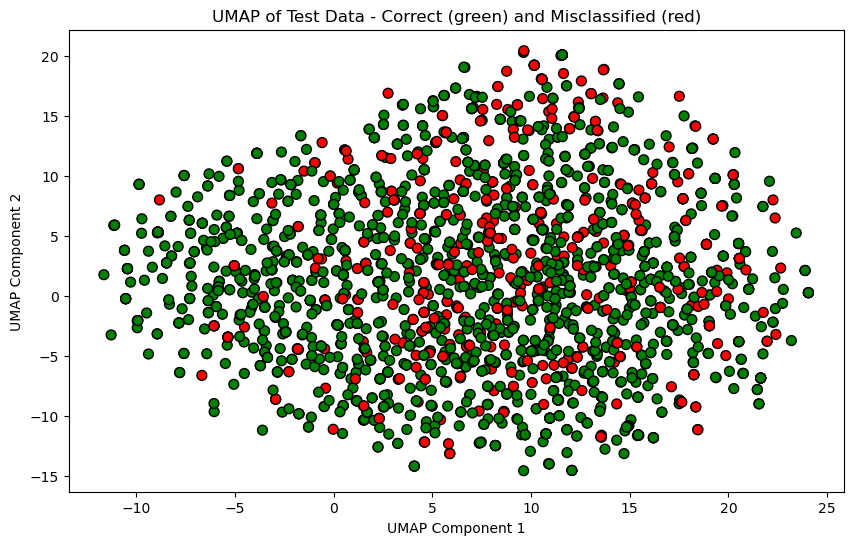

In [107]:
plt.figure(figsize=(10, 6))
colors = ['green' if pred == true else 'red' for pred, true in zip(predictions, y_test)]

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, marker='o', edgecolor='k', s=50)
plt.title('UMAP of Test Data - Correct (green) and Misclassified (red)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

In [108]:
# Dimensionality reduction using UMAP
reducer = umap.UMAP(n_components=20,n_neighbors=2, random_state=42)
X_train_umap = reducer.fit_transform(X_train_scaled)
X_test_umap = reducer.transform(X_test_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['green' if pred == true else 'red' for pred, true in zip(y_pred, y_test)]

px.scatter_3d(x=X_train_umap[:, 0], y=X_train_umap[:, 1],z=X_train_umap[:,2], color=train_data["Churn"])

<Figure size 1000x600 with 0 Axes>

In [102]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
lr=LogisticRegression(class_weight={0:1,1:1})
lr.fit(X_train_umap,y_train)
predictions=cross_val_predict(lr,X_test_umap,y_test)
print("logistic regression accuracy :",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic regression accuracy : 0.750592697961119
auc roc 0.6175710594315245
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1548
         1.0       0.55      0.33      0.42       561

    accuracy                           0.75      2109
   macro avg       0.67      0.62      0.63      2109
weighted avg       0.73      0.75      0.73      2109



In [103]:
y_train.value_counts()/len(y_train)

Churn
0.0    0.734308
1.0    0.265692
Name: count, dtype: float64

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
class_proportions = [0.3, 0.7]  # For example, class 0 has 30% and class 1 has 70% of the data

lda = LinearDiscriminantAnalysis(priors=class_proportions)
lda.fit(X_train_umap,y_train)

LinearDiscriminantAnalysis(priors=[0.3, 0.7])

In [82]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
predictions= cross_val_predict(lda,X_test_umap,y_test)

print("logistic regression accuracy :",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic regression accuracy : 0.3361782835467046
auc roc 0.5415526675786593
              precision    recall  f1-score   support

         0.0       0.94      0.10      0.19      1548
         1.0       0.28      0.98      0.44       561

    accuracy                           0.34      2109
   macro avg       0.61      0.54      0.31      2109
weighted avg       0.76      0.34      0.25      2109



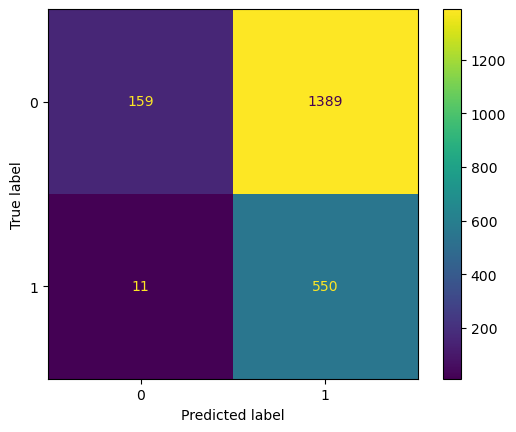

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions))
fig.plot()

In [84]:
from sklearn.metrics import roc_auc_score,f1_score,precision_score,accuracy_score,recall_score,matthews_corrcoef
# Evaluation
roc_auc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test,predictions)
precision = precision_score(y_test,predictions)
coef = matthews_corrcoef(y_test,predictions)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"\033[1mRecall score: {recall:.2f}\033[0m")
print(f"precision : {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Corr : {coef}")

ROC AUC: 0.54
F1 Score: 0.44
Recall score: 0.98
precision : 0.28
Accuracy: 0.34
Corr : 0.13489083681444894


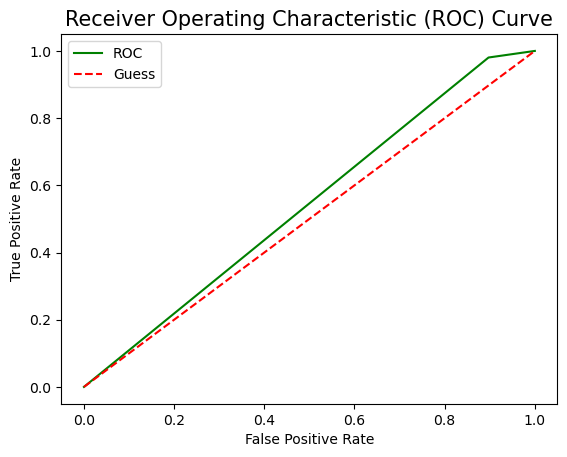

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

In [60]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions)

(array([0.92341941, 0.48174442]),
 array([0.66989664, 0.84670232]),
 array([0.77648821, 0.61409179]),
 array([1548,  561], dtype=int64))